In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from moviepy.editor import *

In [2]:
def getGrayedImageWithNoiseRemoved(image):
    # Convert image to gray
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # kernal or window, we are using 3x3
    kernel = 3
    blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
    return blur

In [3]:
def getCannyImage(image):
    canny = cv2.Canny(image, 50, 150)
    return canny

In [4]:
def getRegionOfInterest(image, videoName):
    height = image.shape[0]
    width = image.shape[1]
    mask = np.zeros_like(image)
    if "challenge" in videoName:
        triangle = np.array([[
        (160, height-60),
        (700, 430),
        (1100, height-60),]], np.int32)
    else:
        triangle = np.array([[
        (0, height),
        (500, 310),
        (890, height),]], np.int32)
 
    cv2.fillPoly(mask, triangle, 255)
    maskedImage = cv2.bitwise_and(image, mask)
    return maskedImage

In [5]:
def displayImage(image):
    # converting image back to RGB to be displayed using matplotlib function
    convertedImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(convertedImage)

In [6]:
def addLinesToImage(img,lines):
    imageWithLines = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(imageWithLines,(x1,y1),(x2,y2),(255,255,0),10)
    return imageWithLines

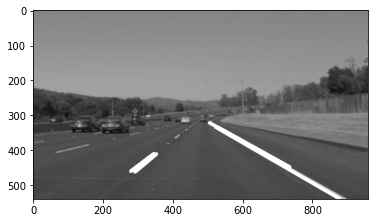

In [7]:
readImg = cv2.imread("solidWhiteCurve.jpg")
roadImg = np.copy(readImg)
grayedImage = getGrayedImageWithNoiseRemoved(roadImg)
cannyImage = getCannyImage(grayedImage)
croppedImage = getRegionOfInterest(cannyImage, "")
lines = cv2.HoughLinesP(croppedImage, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
linedImage = addLinesToImage(croppedImage, lines)
comnbinedImage = cv2.addWeighted(grayedImage, 0.8, linedImage, 1, 0)
displayImage(comnbinedImage)

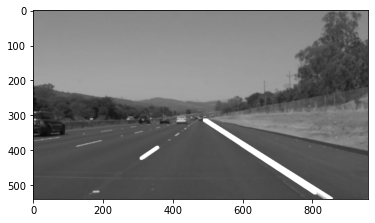

In [8]:
readImg = cv2.imread("solidWhiteRight.jpg")
roadImg = np.copy(readImg)
grayedImage = getGrayedImageWithNoiseRemoved(roadImg)
cannyImage = getCannyImage(grayedImage)
croppedImage = getRegionOfInterest(cannyImage, "")
lines = cv2.HoughLinesP(croppedImage, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
linedImage = addLinesToImage(croppedImage, lines)
comnbinedImage = cv2.addWeighted(grayedImage, 0.8, linedImage, 1, 0)
displayImage(comnbinedImage)

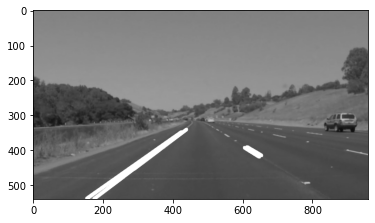

In [9]:
readImg = cv2.imread("solidYellowCurve.jpg")
roadImg = np.copy(readImg)
grayedImage = getGrayedImageWithNoiseRemoved(roadImg)
cannyImage = getCannyImage(grayedImage)
croppedImage = getRegionOfInterest(cannyImage, "")
lines = cv2.HoughLinesP(croppedImage, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
linedImage = addLinesToImage(croppedImage, lines)
comnbinedImage = cv2.addWeighted(grayedImage, 0.8, linedImage, 1, 0)
displayImage(comnbinedImage)

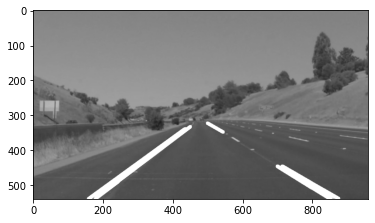

In [10]:
readImg = cv2.imread("solidYellowCurve2.jpg")
roadImg = np.copy(readImg)
grayedImage = getGrayedImageWithNoiseRemoved(roadImg)
cannyImage = getCannyImage(grayedImage)
croppedImage = getRegionOfInterest(cannyImage, "")
lines = cv2.HoughLinesP(croppedImage, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
linedImage = addLinesToImage(croppedImage, lines)
comnbinedImage = cv2.addWeighted(grayedImage, 0.8, linedImage, 1, 0)
displayImage(comnbinedImage)

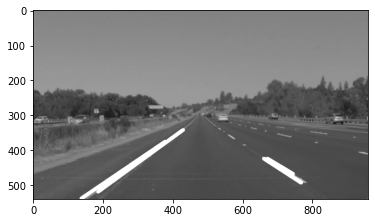

In [11]:
readImg = cv2.imread("solidYellowLeft.jpg")
roadImg = np.copy(readImg)
grayedImage = getGrayedImageWithNoiseRemoved(roadImg)
cannyImage = getCannyImage(grayedImage)
croppedImage = getRegionOfInterest(cannyImage, "")
lines = cv2.HoughLinesP(croppedImage, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
linedImage = addLinesToImage(croppedImage, lines)
comnbinedImage = cv2.addWeighted(grayedImage, 0.8, linedImage, 1, 0)
displayImage(comnbinedImage)

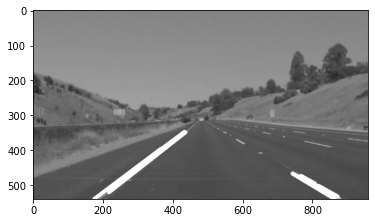

In [12]:
readImg = cv2.imread("whiteCarLaneSwitch.jpg")
roadImg = np.copy(readImg)
grayedImage = getGrayedImageWithNoiseRemoved(roadImg)
cannyImage = getCannyImage(grayedImage)
croppedImage = getRegionOfInterest(cannyImage, "")
lines = cv2.HoughLinesP(croppedImage, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
linedImage = addLinesToImage(croppedImage, lines)
comnbinedImage = cv2.addWeighted(grayedImage, 0.8, linedImage, 1, 0)
displayImage(comnbinedImage)

In [ ]:
videoName = "solidYellowLeft.mp4"
clip = VideoFileClip(videoName)
frames = clip.iter_frames()

for frame in frames:
    if frame is not None:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        displayImage(gray)
        # kernal or window, we are using 3x3
        kernel = 3
        blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
        cannyImage = getCannyImage(blur)
        displayImage(cannyImage)
        croppedImage = getRegionOfInterest(cannyImage, videoName)
        displayImage(croppedImage)
        lines = cv2.HoughLinesP(croppedImage, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
        linedImage = addLinesToImage(frame, lines)
        combinedImage = cv2.addWeighted(frame, 0.8, linedImage, 1, 1)
        cv2.imshow("result", combinedImage)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        continue
cv2.destroyAllWindows()

In [ ]:
videoName = "solidWhiteRight.mp4"
clip = VideoFileClip(videoName)
frames = clip.iter_frames()

for frame in frames:
    if frame is not None:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        displayImage(gray)
        # kernal or window, we are using 3x3
        kernel = 3
        blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
        cannyImage = getCannyImage(blur)
        displayImage(cannyImage)
        croppedImage = getRegionOfInterest(cannyImage, videoName)
        lines = cv2.HoughLinesP(croppedImage, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
        linedImage = addLinesToImage(frame, lines)
        combinedImage = cv2.addWeighted(frame, 0.8, linedImage, 1, 1)
        cv2.imshow("result", combinedImage)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        continue
cv2.destroyAllWindows()

In [ ]:
videoName = "challenge.mp4"
clip = VideoFileClip(videoName)
frames = clip.iter_frames()

for frame in frames:
    if frame is not None:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        displayImage(gray)
        # kernal or window, we are using 3x3
        kernel = 3
        blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
        cannyImage = getCannyImage(blur)
        displayImage(cannyImage)
        croppedImage = getRegionOfInterest(cannyImage, videoName)
        lines = cv2.HoughLinesP(croppedImage, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
        linedImage = addLinesToImage(frame, lines)
        combinedImage = cv2.addWeighted(frame, 0.8, linedImage, 1, 1)
        cv2.imshow("result", combinedImage)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        continue
cv2.destroyAllWindows()
